In [4]:
from pandas import read_csv, DataFrame
import numpy as np
import itertools
from math import sqrt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler as ssc
from sklearn.neighbors import KNeighborsRegressor as knr
from sklearn.ensemble import RandomForestClassifier as rfc, RandomForestRegressor as rfr
# from xgboost.sklearn import XGBRegressor
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler as ssc
from sklearn.decomposition import PCA

In [6]:
def plot_confusion_matrix(observed, predicted,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    cm = confusion_matrix(observed, predicted)
    classes = list(observed.unique())
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print('F1 Score: %s'%f1_score(list(observed), list(predicted), average='micro'))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [11]:
data = read_csv("trainingData.csv", sep=",")
data2=data[:10]
[i for i in data2.columns.values if 'WAP' not in i]

['LONGITUDE',
 'LATITUDE',
 'FLOOR',
 'BUILDINGID',
 'SPACEID',
 'RELATIVEPOSITION',
 'USERID',
 'PHONEID',
 'TIMESTAMP']

In [13]:
data.replace(100, np.nan, inplace=True)
data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']] = \
data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']].astype(str)

In [16]:
x_columns = [i for i in data.columns.values if 'WAP' in i]
metadata_fields = [i for i in data.columns.values if 'WAP' not in i]
data[x_columns].describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
count,18.000000,19.000000,0.0,0.0,40.000000,308.000000,578.000000,677.000000,595.000000,87.000000,...,1653.000000,14.000000,123.000000,126.000000,60.000000,3038.000000,4543.000000,22.000000,3.000000,0.0
mean,-95.333333,-87.894737,NaN,NaN,-92.525000,-85.746753,-81.652249,-81.988183,-77.793277,-91.632184,...,-81.218996,-89.571429,-81.333333,-84.603175,-87.233333,-72.557604,-76.023993,-91.545455,-96.000000,NaN
std,1.137593,2.051957,NaN,NaN,2.148195,8.343256,11.486342,9.680083,10.239520,3.760613,...,12.427483,5.258170,5.580509,4.897476,4.533740,14.605846,12.056910,3.725425,1.732051,NaN
min,-97.000000,-90.000000,NaN,NaN,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,-103.000000,-97.000000,-92.000000,-90.000000,-97.000000,-101.000000,-101.000000,-97.000000,-97.000000,NaN
25%,-96.000000,-90.000000,NaN,NaN,-94.000000,-91.000000,-91.000000,-88.000000,-87.000000,-95.000000,...,-90.000000,-95.000000,-86.000000,-88.000000,-91.250000,-84.000000,-85.000000,-95.000000,-97.000000,NaN
50%,-96.000000,-86.000000,NaN,NaN,-92.000000,-88.000000,-84.000000,-85.000000,-78.000000,-90.000000,...,-84.000000,-86.000000,-82.000000,-86.000000,-85.000000,-74.000000,-77.000000,-91.000000,-97.000000,NaN
75%,-94.250000,-86.000000,NaN,NaN,-91.750000,-82.750000,-75.000000,-76.000000,-71.000000,-90.000000,...,-72.000000,-85.000000,-77.000000,-83.000000,-84.000000,-63.000000,-70.000000,-88.000000,-95.500000,NaN
max,-93.000000,-86.000000,NaN,NaN,-89.000000,-58.000000,-47.000000,-61.000000,-50.000000,-84.000000,...,-2.000000,-85.000000,-70.000000,-67.000000,-82.000000,0.000000,0.000000,-87.000000,-94.000000,NaN


In [18]:
data[metadata_fields].describe(include=['object'])

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


In [20]:
data[['BUILDINGID','FLOOR']].groupby(['BUILDINGID','FLOOR']).size()

BUILDINGID  FLOOR
0           0        1059
            1        1356
            2        1443
            3        1391
1           0        1368
            1        1484
            2        1396
            3         948
2           0        1942
            1        2162
            2        1577
            3        2709
            4        1102
dtype: int64

In [22]:
data[['LONGITUDE', 'LATITUDE']].describe()

,LONGITUDE,LATITUDE
count,19937.000000,1.993700e+04
mean,-7464.275947,4.864871e+06
std,123.402010,6.693318e+01
min,-7691.338400,4.864746e+06
25%,-7594.737000,4.864821e+06
50%,-7423.060900,4.864852e+06
75%,-7359.193000,4.864930e+06
max,-7300.818990,4.865017e+06


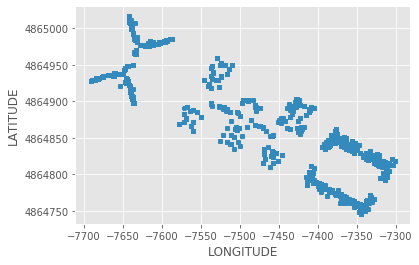

In [24]:
data.plot.scatter('LONGITUDE', 'LATITUDE')

In [26]:

print('data pre-drop ',data.shape)
data.dropna(how='all', axis=1, inplace=True)
data.dropna(how='all', axis=0, inplace=True)
print('data post-drop ', data.shape)
#Also update our list of input columns
x_columns = [i for i in data.columns.values if 'WAP' in i]

data pre-drop  (19937, 474)
data post-drop  (19937, 474)


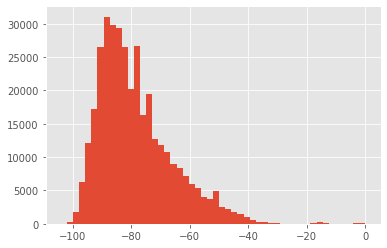

In [30]:
# Signal data check 

data[x_columns].stack().hist(bins=50)


In [33]:
data[x_columns].stack().min()

-104.0

In [35]:
data[x_columns].stack().max()

0.0

In [37]:
data_norm_scale = np.power(10,data[x_columns]/10,)

In [39]:
data_norm_scale.describe()

,WAP001,WAP002,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,WAP011,WAP012,...,WAP510,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519
count,1.800000e+01,1.900000e+01,4.000000e+01,3.080000e+02,5.780000e+02,6.770000e+02,5.950000e+02,8.700000e+01,2.956000e+03,2.983000e+03,...,1.000000e+00,1.653000e+03,1.400000e+01,1.230000e+02,1.260000e+02,6.000000e+01,3.038000e+03,4.543000e+03,2.200000e+01,3.000000e+00
mean,3.028256e-10,1.795730e-09,6.270040e-10,4.967492e-08,3.691462e-07,7.115804e-08,2.622416e-07,1.012703e-09,5.403109e-04,3.223629e-03,...,1.995262e-10,1.327011e-03,1.845213e-09,1.630365e-08,1.015603e-08,2.763273e-09,3.863118e-03,3.130109e-03,9.581295e-10,2.657199e-10
std,8.362135e-11,7.755814e-10,3.015201e-10,2.116538e-07,1.946379e-06,1.563738e-07,9.695467e-07,1.043779e-09,1.345044e-02,5.493915e-02,...,NaN,2.534614e-02,1.402442e-09,2.240715e-08,2.905687e-08,1.787388e-09,6.114994e-02,5.444595e-02,7.015158e-10,1.146508e-10
min,1.995262e-10,1.000000e-09,1.995262e-10,1.584893e-10,1.258925e-10,1.584893e-10,1.584893e-10,1.258925e-10,7.943282e-11,7.943282e-11,...,1.995262e-10,5.011872e-11,1.995262e-10,6.309573e-10,1.000000e-09,1.995262e-10,7.943282e-11,7.943282e-11,1.995262e-10,1.995262e-10
25%,2.511886e-10,1.000000e-09,3.981072e-10,7.943282e-10,7.943282e-10,1.584893e-09,1.995262e-09,3.162278e-10,3.162278e-09,3.162278e-09,...,1.995262e-10,1.000000e-09,3.162278e-10,2.511886e-09,1.584893e-09,7.534855e-10,3.981072e-09,3.162278e-09,3.162278e-10,1.995262e-10
50%,2.511886e-10,2.511886e-09,6.309573e-10,1.584893e-09,3.981072e-09,3.162278e-09,1.584893e-08,1.000000e-09,2.511886e-08,2.511886e-08,...,1.995262e-10,3.981072e-09,2.511886e-09,6.309573e-09,2.511886e-09,3.162278e-09,3.981072e-08,1.995262e-08,7.943282e-10,1.995262e-10
75%,3.776373e-10,2.511886e-09,6.718001e-10,5.336298e-09,3.162278e-08,2.511886e-08,7.943282e-08,1.000000e-09,1.995262e-07,1.995262e-07,...,1.995262e-10,6.309573e-08,3.162278e-09,1.995262e-08,5.011872e-09,3.981072e-09,5.011872e-07,1.000000e-07,1.584893e-09,2.988167e-10
max,5.011872e-10,2.511886e-09,1.258925e-09,1.584893e-06,1.995262e-05,7.943282e-07,1.000000e-05,3.981072e-09,5.011872e-01,1.000000e+00,...,1.995262e-10,6.309573e-01,3.162278e-09,1.000000e-07,1.995262e-07,6.309573e-09,1.000000e+00,1.000000e+00,1.995262e-09,3.981072e-10


In [41]:
from IPython.display import display

class  DataPrep():
    def __init__(self):
        
        self.x_columns = []
        self.metadata_columns = []
        self.pca_columns = []
        self.scaler = ssc()
        self.pca = PCA()
        self.pre_pca_columns = []
        
    def fit(self,dat):
        
        data = dat.copy()
        data.loc[:,['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']] = \
        data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']].astype(str)
        
        x_columns_all = [i for i in data.columns.values if 'WAP' in i]
        data.loc[:,x_columns_all] = data.loc[:,x_columns_all].replace(100, np.nan)      

        data = data.dropna(how='all', axis=1)
        data = data.dropna(how='all', axis=0)
        
        self.pre_pca_columns = data.columns.values

        self.x_columns = [i for i in data.columns.values if 'WAP' in i]
        self.metadata_columns = [i for i in data.columns.values if 'WAP' not in i]
        
        data.loc[:,self.x_columns] = np.power(10,data[self.x_columns]/10)
        data.loc[:,self.x_columns] = data.loc[:,self.x_columns].fillna(0)
        self.scaler.fit(data[self.x_columns])
        data.loc[:,self.x_columns] = self.scaler.transform(data[self.x_columns])        
        self.pca.fit(data[self.x_columns])
        pca_data = DataFrame(self.pca.transform(data[self.x_columns]))
        self.pca_columns = ['PCA_%s'%i for i in pca_data.columns.values]
        components = DataFrame(data=[self.pca.n_components_, self.pca.explained_variance_ratio_], columns=['explained_variance'])
        components['cum_variance'] = components.explained_variance.cumsum()
        display(components)
        
    def transform(self,dat, dev=False):
        data = dat.copy()
            
        data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']] = \
        data[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']].astype(str)
        data = data.loc[:,self.pre_pca_columns].copy()
        data.loc[:,self.x_columns] = data.loc[:,self.x_columns].replace(100, np.nan)
        data.loc[:,self.x_columns] = np.power(10,data[self.x_columns]/10)
        data.loc[:,self.x_columns] = data.loc[:,self.x_columns].fillna(0)
        data.loc[:,self.x_columns] = self.scaler.transform(data[self.x_columns]) 
        pca_data = DataFrame(self.pca.transform(data[self.x_columns]))
        
        self.pca_columns = ['PCA_%s'%i for i in pca_data.columns.values]
        pca_data.columns=self.pca_columns
        
        if dev:
            data['PARTITION'] = np.random.randint(0,3, size=len(data))
        else:
            pass
        
        
        for i in pca_data.columns.values:
            data.loc[:,i] = list(pca_data[i])
        
        return data

class LocationModel():
    def __init__(self):
        self.prep = DataPrep()
        self.building_model = None
        self.floor_models = {}
        self.location_models = {}


    def fit(self, data):

        '''
        data {pandas.DataFrame}: dataframe containing training data

        '''
        #Data Prep
        modeling_data = self.prep.fit(data)
        modeling_data = self.prep.transform(data, dev=True)
        building_training = modeling_data[modeling_data.PARTITION == 0].copy()
        location_training = modeling_data[modeling_data.PARTITION == 1].copy()
        test = modeling_data[modeling_data.PARTITION == 2].copy()
        
        #Building Model
        self.building_model = rfc(n_estimators = 200)
        
        self.building_model.fit(building_training[self.prep.pca_columns], building_training['BUILDINGID'])
        results = self.building_model.predict(test[self.prep.pca_columns])
        plot_confusion_matrix(test['BUILDINGID'], results, normalize=True)
      
        
        #Train Floor model based on building
        for i in modeling_data.BUILDINGID.unique():
            floordata = building_training[building_training.BUILDINGID == i]
            floortestdata = test[test.BUILDINGID == i]
            
            # Floor Model
            floor_model = rfc(n_estimators = 200)
            
            floor_model.fit(floordata[self.prep.pca_columns], floordata['FLOOR'])
            results = floor_model.predict(floortestdata[self.prep.pca_columns])
            print('Confusion Matrix for floor prediction, Building %s'%i)
            plot_confusion_matrix(floortestdata['FLOOR'], results, normalize=True)
            self.floor_models[str(i)] = floor_model

        #Train location model based on building
        for i in modeling_data.BUILDINGID.unique():
            locationdata = location_training[location_training.BUILDINGID == i]
            locationtestdata = test[test.BUILDINGID == i]
            
            from sklearn.neighbors import KNeighborsRegressor as knr
            location_model = knr(algorithm='auto', leaf_size=30,
                  metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                  weights='distance')
            
            location_model.fit(locationdata[self.prep.pca_columns], locationdata[['LONGITUDE', 'LATITUDE']])
            results = DataFrame(location_model.predict(locationtestdata[self.prep.pca_columns]), 
                                columns=['LONGITUDE', 'LATITUDE'])
            print('Buidlding %s lon RMSE: %s'%(i, sqrt(mean_squared_error(locationtestdata['LONGITUDE'], 
                                                                          results['LONGITUDE']))))
            print('Buidlding %s lat RMSE: %s'%(i, sqrt(mean_squared_error(locationtestdata['LATITUDE'], 
                                                                          results['LATITUDE']))))
            ax1 = locationtestdata.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', color='r')    
            ax2 = results.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', color='g', ax=ax1, title='building # %s'%i)
            
            self.location_models[str(i)] = location_model
        
    def predict(self, data):
        data = data.copy()
        data = self.prep.transform(data)

        building_prediction = self.building_model.predict(data[self.prep.pca_columns])
        data.loc[:,'BUILDINGID_PRED'] = building_prediction
        ids = data.BUILDINGID_PRED.unique()
        
        for bldg_id in data.BUILDINGID_PRED.unique():
            bldg_data = data[data.BUILDINGID_PRED == bldg_id]
            
            data.loc[data.BUILDINGID_PRED == bldg_id,'FLOOR_PRED'] = self.floor_models[str(bldg_id)].predict(bldg_data[self.prep.pca_columns])
            location = self.location_models[str(bldg_id)].predict(bldg_data[self.prep.pca_columns]) 
            data.loc[data.BUILDINGID_PRED == bldg_id, 'LON_PRED'] = [i[0] for i in location]
            data.loc[data.BUILDINGID_PRED == bldg_id, 'LAT_PRED'] = [i[1] for i in location]

        return data

,explained_variance,cum_variance
0,461,461
1,"[0.02025962547433892, 0.019816022506308307, 0....","[461.02025962547435, 461.0198160225063, 461.01..."


Normalized confusion matrix
F1 Score: 0.9908977333571302


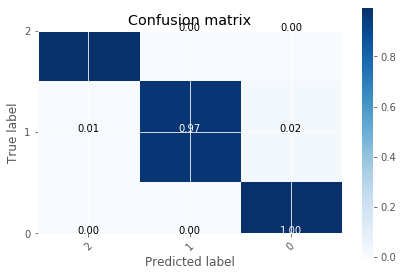

Confusion Matrix for floor prediction, Building 2
Normalized confusion matrix
F1 Score: 0.8954224041682174


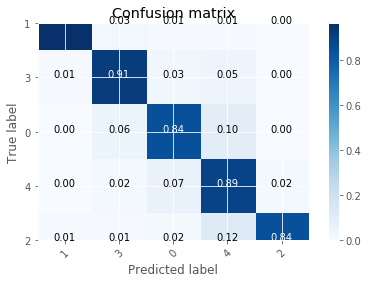

Confusion Matrix for floor prediction, Building 1
Normalized confusion matrix
F1 Score: 0.9587988826815642


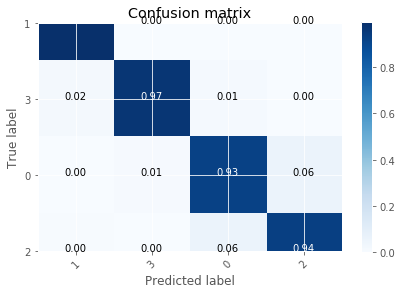

Confusion Matrix for floor prediction, Building 0
Normalized confusion matrix
F1 Score: 0.9130727762803235


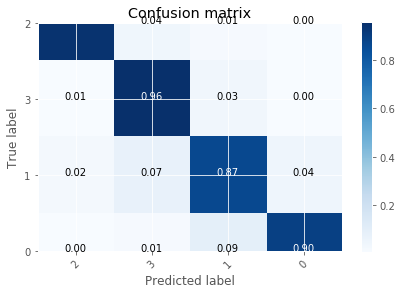

Buidlding 2 lon RMSE: 14.754259376594485
Buidlding 2 lat RMSE: 12.22918345361146
Buidlding 1 lon RMSE: 13.199720580350423
Buidlding 1 lat RMSE: 9.422325297322137
Buidlding 0 lon RMSE: 10.936571614184617
Buidlding 0 lat RMSE: 13.548786408160346


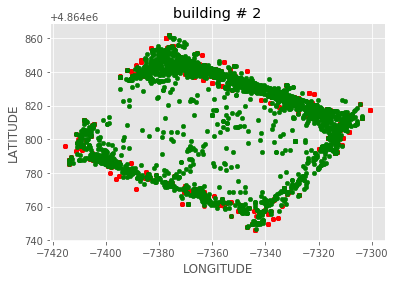

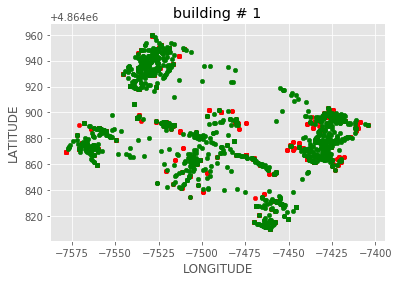

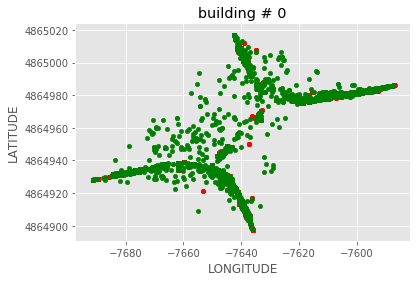

In [44]:
from sklearn.model_selection import train_test_split

data_original = read_csv('trainingData.csv')
# prep = DataPrep()
# prepped_data= prep.fit(data)
# test = prepped_data[prepped_data['PARTITION'] == 0]
# building_train = prepped_data[prepped_data['PARTITION'] == 1]
# location_train = prepped_data[prepped_data['PARTITION'] == 2]

train, test = train_test_split(data_original, test_size=0.15)

model = LocationModel()
model.fit(train)
output = model.predict(test)

Longitude RMSE 18.19415406477289
Latitude RMSE 13.96808862209795


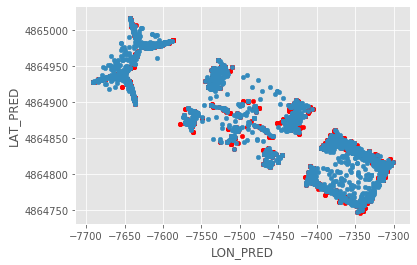

In [49]:
ax1 = output.plot(kind='scatter', x='LONGITUDE', y='LATITUDE',color='r')    
ax2 = output.plot(kind='scatter', x='LON_PRED', y='LAT_PRED', ax=ax1)

print('Longitude RMSE', sqrt(mean_squared_error(output['LONGITUDE'], output['LON_PRED'])))
print('Latitude RMSE', sqrt(mean_squared_error(output['LATITUDE'], output['LAT_PRED'])))

Normalized confusion matrix
F1 Score: 0.9933132731527917


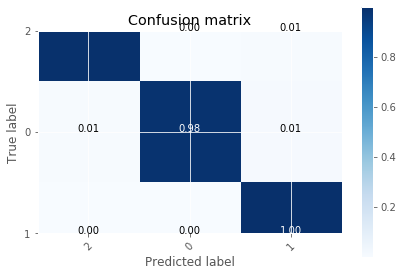

In [51]:
plot_confusion_matrix(output.BUILDINGID, output.BUILDINGID_PRED, normalize=True)

Normalized confusion matrix
F1 Score: 0.9060514877967235


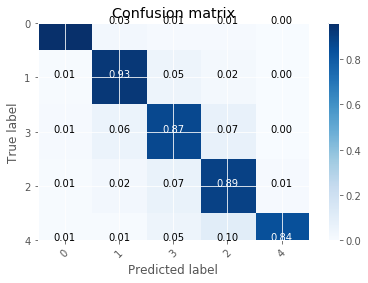

In [53]:

plot_confusion_matrix(output.FLOOR, output.FLOOR_PRED, normalize=True)

In [54]:
import pickle
with open('location_model.pkl', 'wb') as outfile:
    pickle.dump(model, outfile)